In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [2]:
df = sns.load_dataset('penguins')

In [3]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [4]:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [5]:
#Handling the missing values

median_imputer = SimpleImputer(missing_values=np.nan, strategy='median')
df['body_mass_g'] = median_imputer.fit_transform(df[['body_mass_g']])

mode_imputer = SimpleImputer(missing_values = np.nan,strategy='most_frequent')
df['sex'] = mode_imputer.fit_transform(df[['sex']]).ravel()

cols = ['bill_length_mm','bill_depth_mm','flipper_length_mm']
knn_imputer = KNNImputer(n_neighbors=5)
df[cols] = knn_imputer.fit_transform(df[cols])

In [6]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.0,Male
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.0,Female
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.0,Female
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4050.0,Male
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,43.92193,17.15117,200.915205,4050.0,Male
340,Gentoo,Biscoe,46.80000,14.30000,215.000000,4850.0,Female
341,Gentoo,Biscoe,50.40000,15.70000,222.000000,5750.0,Male
342,Gentoo,Biscoe,45.20000,14.80000,212.000000,5200.0,Female


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     344 non-null    float64
 3   bill_depth_mm      344 non-null    float64
 4   flipper_length_mm  344 non-null    float64
 5   body_mass_g        344 non-null    float64
 6   sex                344 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [8]:
#Used LabelEncoding for encoding the values
df['sex'] = df['sex'].map({'Male':1,'Female':0})

category_values = ['species','island']
numerical_values = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

le = LabelEncoder()

df['species'] = le.fit_transform(df['species'])
df['island'] = le.fit_transform(df['island'])

In [9]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.10000,18.70000,181.000000,3750.0,1
1,0,2,39.50000,17.40000,186.000000,3800.0,0
2,0,2,40.30000,18.00000,195.000000,3250.0,0
3,0,2,43.92193,17.15117,200.915205,4050.0,1
4,0,2,36.70000,19.30000,193.000000,3450.0,0
...,...,...,...,...,...,...,...
339,2,0,43.92193,17.15117,200.915205,4050.0,1
340,2,0,46.80000,14.30000,215.000000,4850.0,0
341,2,0,50.40000,15.70000,222.000000,5750.0,1
342,2,0,45.20000,14.80000,212.000000,5200.0,0


In [12]:
#Splitting into testing and training sets

y = df['species'] #target value
X = df.drop('species',axis=1)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [31]:
#Using Logistic Regression model

model = LogisticRegression(max_iter=100)
model.fit(X_train,y_train)
predictions = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, predictions))

Accuracy: 0.9855072463768116


C:\Users\Arun J\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [11]:
#Using Random Forest Classifier model

model = RandomForestClassifier(random_state=42)
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))

Accuracy: 1.0


In [15]:
#To check if our model is undergoing overfitting
train_pred = model.predict(X_train)
train_acc = accuracy_score(y_train, train_pred)


test_pred = model.predict(X_test)
test_acc = accuracy_score(y_test, test_pred)

print(f"Training Accuracy: {train_acc}")
print(f"Testing Accuracy:  {test_acc}")

Training Accuracy: 1.0
Testing Accuracy:  1.0


**Fortunately, Since our model has Testing accuracy = Training accuracy, the model does not undergo overfitting**

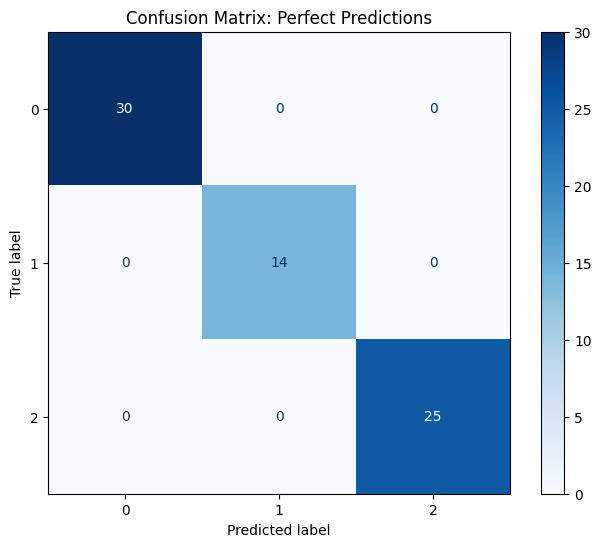

In [18]:
#Visualization

cm = confusion_matrix(y_test, predictions)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(cmap='Blues', ax=ax)
plt.title('Confusion Matrix: Perfect Predictions')
plt.show()